In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq, rfft, ifft, fft2
from scipy.io import loadmat
from scipy.stats import kde
from matplotlib import colors
from scipy.signal import blackman
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [4]:
spacialsmoothed1 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_08.46.58.mat ') 
Reko1=spacialsmoothed1["RekoCSspatialsmoothed"]
spacialsmoothed2 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_08.56.55.mat ') 
Reko2=spacialsmoothed2["RekoCSspatialsmoothed"]
spacialsmoothed3 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_09.07.54.mat ') 
Reko3=spacialsmoothed3["RekoCSspatialsmoothed"]
spacialsmoothed4 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_09.17.56.mat ') 
Reko4=spacialsmoothed4["RekoCSspatialsmoothed"]
spacialsmoothed5 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_09.29.03.mat ') 
Reko5=spacialsmoothed5["RekoCSspatialsmoothed"]
spacialsmoothed6 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_09.40.38.mat ') 
Reko6=spacialsmoothed6["RekoCSspatialsmoothed"]
spacialsmoothed7 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\Results\\data_RekoCSspatialsmoothed_09.11.2020_09.40.38.mat ') 
Reko7=spacialsmoothed7["RekoCSspatialsmoothed"]
spacialsmoothed8 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_11.01.32.mat ') 
Reko8=spacialsmoothed8["RekoCSspatialsmoothed"]
spacialsmoothed9 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_12.25.26.mat ') 
Reko9=spacialsmoothed9["RekoCSspatialsmoothed"]
spacialsmoothed10 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_12.49.06.mat ') 
Reko10=spacialsmoothed10["RekoCSspatialsmoothed"]
spacialsmoothed11 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_12.58.54.mat ') 
Reko11=spacialsmoothed11["RekoCSspatialsmoothed"]
spacialsmoothed12 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_13.13.35.mat ') 
Reko12=spacialsmoothed12["RekoCSspatialsmoothed"]
spacialsmoothed13 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_13.23.17.mat ') 
Reko13=spacialsmoothed13["RekoCSspatialsmoothed"]
spacialsmoothed14 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_15.09.24.mat ') 
Reko14=spacialsmoothed14["RekoCSspatialsmoothed"]
spacialsmoothed15 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_15.20.40.mat ') 
Reko15=spacialsmoothed15["RekoCSspatialsmoothed"]
spacialsmoothed16 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_15.30.40.mat ') 
Reko16=spacialsmoothed16["RekoCSspatialsmoothed"]
spacialsmoothed17 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_15.40.37.mat ') 
Reko17=spacialsmoothed17["RekoCSspatialsmoothed"]
spacialsmoothed18 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_15.50.23.mat ') 
Reko18=spacialsmoothed18["RekoCSspatialsmoothed"]
spacialsmoothed19 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_16.00.18.mat ') 
Reko19=spacialsmoothed19["RekoCSspatialsmoothed"]
spacialsmoothed20 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_09.11.2020_16.10.15.mat ') 
Reko20=spacialsmoothed20["RekoCSspatialsmoothed"]


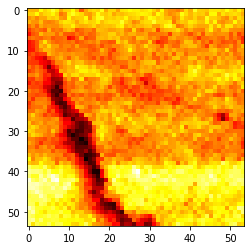

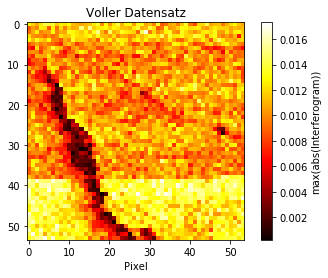

In [5]:
zweiD = np.zeros((54,54))
for i in range (0,54):
    for j in range (0,54):
        zweiD[i,j]= abs(Reko1[i,j,200])  
plt.imshow(zweiD, cmap='hot', interpolation='none')
plt.show()
datafull0 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_full_02.11.2020_14.23.48.mat')

datafull=datafull0["data_full"]
datafull.shape
zweiDb = np.zeros((54,54))

    for j in range (0,54):
        zweiDb[i,j]= abs(datafull[i,j,200])  

plt.title('Voller Datensatz')
plt.xlabel('Pixel')

plt.imshow(zweiDb, cmap='hot', interpolation='none')
cbar=plt.colorbar()
cbar.set_label('max(abs(Interferogram))')
plt.show()


In [ ]:
Definieren der Blackmann-Harris-3-Term-Filterfunktion und der Blackman-Filterunktion mit Lücke

In [4]:
def Filter(Filtertype, Resolution): #Resolution=Length complex data
    if Filtertype==1: #blackmann-Harris-3-Term
        b=np.zeros(400*3)
        Filtered=np.zeros(400*3)
        for z in range (199):
            b[z]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z)/(Resolution/2))  
            #b[z]=np.cos(np.pi*(z-Resolution/2))/(Resolution/2))
            #Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z-Resolution/2))/(Resolution/2)) 
        for z in range (200,400):
            b[z+800]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z+800]= 0.42323 + 0.49755*b[z+800] + 0.07922*np.cos(2*np.pi*(z+800)/(Resolution/2))  
        
        return Filtered
    if filtertype==2: #blackmann with gap
        gap = 0.4
        return blackManFn(z/Resolution, gap)

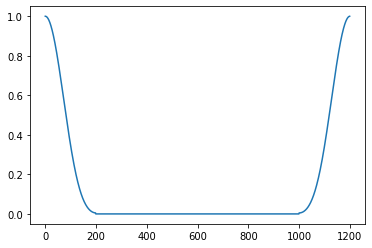

In [5]:
plt.plot(Filter(1,400))

In [6]:
def blackManFn(x, gap):
    if x >=gap and x <= (1 - gap):
        a=np.pi*((x - gap)*(0.5/(-gap + 0.5)) - 1/2)/(1/2)
        b=0.42323 + 0.49755*np.cos(a) + 0.07922*np.cos(2*a)
        return b
    if   x <=  gap or x >= 1 - gap:
        return 0.0049


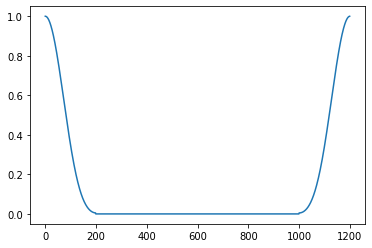

In [7]:
plt.plot(Filter(1,400))
#plt.plot( Filter(1,400*zerofilling))

In [ ]:
Probenkooridinaten der Signal- und Hintergrundsregionen aus denen Grafiken in die Bachelorarbeit integriert wurden

In [8]:
#Signal 1
a=37 #good
b=15 #good

In [38]:
#background
a=20
b=13

In [39]:
#Signal 2
a=18 #good
b=7 #good

In [9]:
Rekonstruktion=Reko5[a,b]
phi=1.0
absolut=np.abs(10*np.exp(1j*phi)+(Rekonstruktion))
oWd=np.zeros(400)
for i in range (400):
    oWd[i]= i*(0.0008/399)*1000


In [10]:

subs5 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Data for matlab\\Subsampled_Input_Data_2020_10_08_140105_E3_45_5.mat ') 
pos5 = subs5["rows_in1"]
subsampled5=subs5["data1"]
subs5=np.abs(10*np.exp(1j*phi)+(subsampled5[a,b]))-np.mean(absolut[0:10])
subs17 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Data for matlab\\Subsampled_Input_Data_2020_10_08_140105_E3_45_17.mat ') 
pos17 = subs17["rows_in1"]
#print(pos17[a,b])

subsampled17=subs17["data1"]
subs17= np.abs(10*np.exp(1j*phi)+(subsampled17[a,b]))-np.mean(absolut[0:10])


1.0


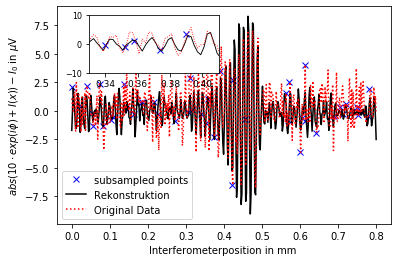

In [11]:
fulldata = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_full_02.11.2020_14.23.48.mat ') 
data_full=fulldata["data_full"]


oWd5=np.zeros(45)
for i in range (0,44):
    oWd5[i]= (pos5[a,b,i]-1)*(0.0008/400)*1000
oWd17=np.zeros(45)
for i in range (0,44):
    oWd17[i]= (pos17[a,b,i]-1)*(0.0008/400)*1000

ang = np.angle(Rekonstruktion)
phi = np.mean(np.abs(np.cos(ang) + 1j * np.sin(ang)))
print (phi)

absolut=np.abs(10*np.exp(1j*phi)+(Rekonstruktion))
I1 = np.abs(10*np.exp(1j*phi)+(Reko5[a,b]))-np.mean(absolut[0:10])
I11 = np.abs(10*np.exp(1j*phi)+(Reko17[a,b]))-np.mean(absolut[0:10])
I2 = np.abs(10*np.exp(1j*phi)+(data_full[a,b]))-np.mean(absolut[0:10])

fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.65, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])


ax1.plot(oWd5,subs5*1000, 'bx',label='subsampled points')
ax1.plot(oWd,I1*1000, 'k-',label='Rekonstruktion')
ax1.plot(oWd,I2*1000, 'r:',label='Original Data')
ax1.legend(loc='lower left')
ax2.plot(oWd5,subs5*1000, 'bx',label='subsampled points')
ax2.plot(oWd,I1*1000, 'k-',label='Rekonstruktion', linewidth=0.9)
ax2.plot(oWd,I2*1000, 'r:',label='Original Data',linewidth=0.9)
ax2.axis([0.33, 0.41, -10,10 ])


ax1.set_xlabel('Interferometerposition in mm ')
ax1.set_ylabel('$abs(10\cdot exp({i \phi})+I(x))-I_0$ in $\mu$V')
ax2.tick_params(axis='y', labelsize=8)
ax2.tick_params(axis='x', labelsize=9)
plt.show() 
#fig.savefig("45randS1good.pdf")

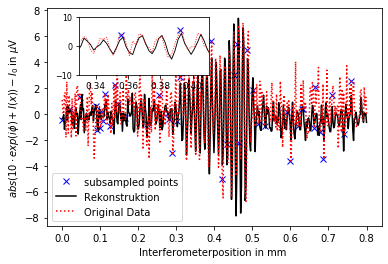

In [12]:
fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.65, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax1.plot(oWd17,subs17*1000, 'bx',label='subsampled points')
ax1.plot(oWd,I11*1000, 'k-',label='Rekonstruktion')
ax1.plot(oWd,I2*1000, 'r:',label='Original Data')
ax1.legend(loc='lower left')
ax2.plot(oWd17,subs17*1000, 'bx',label='subsampled points')
ax2.plot(oWd,I11*1000, 'k-',label='Rekonstruktion', linewidth=0.9)
ax2.plot(oWd,I2*1000, 'r:',label='Original Data',linewidth=0.9)
ax2.axis([0.33, 0.41, -10,10 ])


ax1.set_xlabel('Interferometerposition in mm ')
ax1.set_ylabel('$abs(10\cdot exp({i \phi})+I(x))-I_0$ in $\mu$V')
ax2.tick_params(axis='y', labelsize=8)
ax2.tick_params(axis='x', labelsize=9)
plt.show() 
#fig.savefig("45randS1good.pdf")

Text(0, 0.5, 'abs Amplitude')

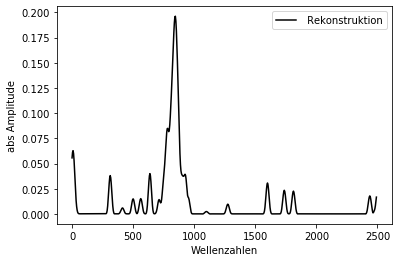

In [13]:
#### zerofilling=3

RekoA=np.zeros((400,),dtype = complex)
FullA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for i in range (0,399):
            RekoA[i]=(Reko17[a,b, i])
            

offsetReko=np.ones((400,),dtype = complex)*np.mean(RekoA[369:399,])
offReko= np.subtract(RekoA,offsetReko)

offRekozerofilling= np.concatenate([offReko,zerof])
wrapindexReko =230                                    #eventuell 299? wg mathematica
wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links

filReko = Filter(1,400)*wrapReko

ftReko = fft(filReko)
ftRekohalve17=ftReko[0:599]



plt.plot(wnVal[0:599,], np.absolute(ftRekohalve17),'k-',label=' Rekonstruktion')


plt.legend()

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

Text(0, 0.5, 'abs Amplitude')

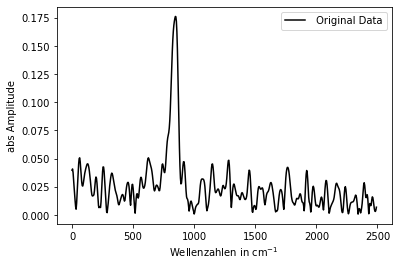

In [14]:
zerofilling=3

RekoA=np.zeros((400,),dtype = complex)
FullA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for i in range (0,399):
            RekoA[i]=(Reko5[a,b, i])
            FullA[i]=(data_full[a,b, i])
            

offsetReko=np.ones((400,),dtype = complex)*np.mean(RekoA[369:399,])
offReko= np.subtract(RekoA,offsetReko)

offRekozerofilling= np.concatenate([offReko,zerof])
wrapindexReko =230                                    #eventuell 299? wg mathematica
wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links

filReko = Filter(1,400)*wrapReko

ftReko = fft(filReko)
ftRekohalve5=ftReko[0:599]

offsetFull=np.ones((400,),dtype = complex)*np.mean(FullA[369:399,])
offFull= np.subtract(FullA,offsetFull)

offFullzerofilling= np.concatenate([offFull,zerof])
wrapindexFull =230                                    #eventuell 299? wg mathematica
wrapFull=np.roll(offFullzerofilling,-wrapindexFull)   # rollt nach links

filFull = Filter(1,400)*wrapFull

ftFull = fft(filFull)
ftFullhalve=ftFull[0:599]

#plt.plot(wnVal[0:599,], np.absolute(ftRekohalve5),'k-',label=' Rekonstruktion')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'k-',label=' Original Data')

plt.legend()

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen in cm$^{-1}$')
plt.ylabel('abs Amplitude')

#pos zwischen 800 und 900 wnVal

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'abs Amplitude')

<Figure size 432x288 with 0 Axes>

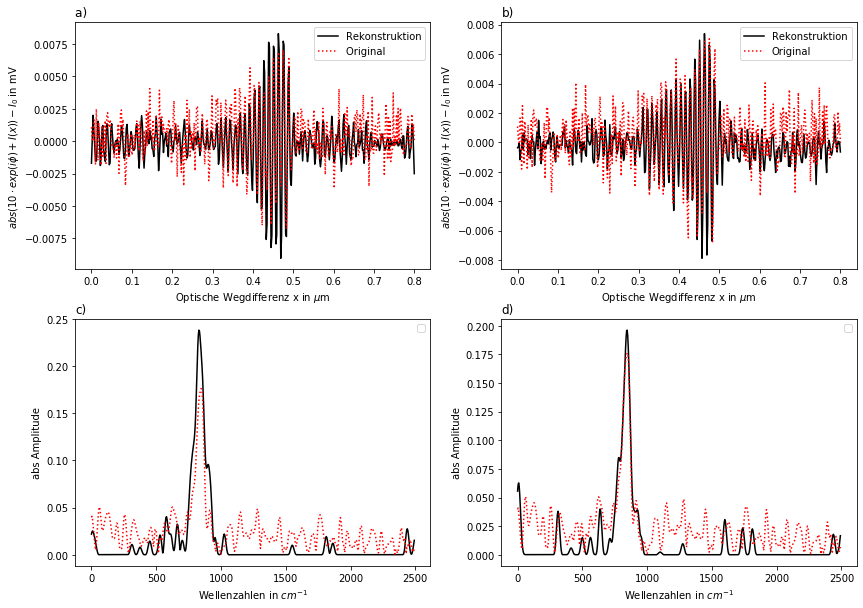

In [15]:
plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10)) 

a=plt.subplot(221) 
plt.title('a) ',loc='left')
#plt.plot(oWd5,subs5, 'bx',label='subsampled Points')
plt.plot(oWd,I1, 'k-',label='Rekonstruktion')
plt.plot(oWd,I2, 'r:',label='Original ')

#plt.axis([0.00078, 0.001600, -0.015, 0.015])
plt.legend()
plt.xlabel('Optische Wegdifferenz x in $\mu$m ')
plt.ylabel('$abs(10\cdot exp({i \phi})+I(x))-I_0$ in mV')

    

    
    

b=plt.subplot(222)
#plt.plot(oWd17,subs17, 'bx',label='subsampled Points')
plt.plot(oWd,I11, 'k-',label='Rekonstruktion')
plt.plot(oWd,I2, 'r:',label='Original')
plt.title('b)', loc='left')
#plt.axis([0.00078, 0.001600, -0.015, 0.015])
##plt.axis([1000, 1300, -0.5, 1.4])
plt.legend()
plt.xlabel('Optische Wegdifferenz x in $\mu$m ')
plt.ylabel('$abs(10\cdot exp({i \phi})+I(x))-I_0$ in mV')

plt.subplot(223) 
plt.title('c)', loc='left')
plt.plot(wnVal[0:599,], np.absolute(ftRekohalve5),'k-')#,label=' Rekonstruktion')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'r:')#,label=' Rekonstruktion')


plt.legend()

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen in $cm^{-1}$')
plt.ylabel('abs Amplitude')

plt.subplot(224)
plt.title('d)', loc='left')
plt.plot(wnVal[0:599,], np.absolute(ftRekohalve17),'k-')#,label=' Rekonstruktion')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'r:')#,label=' Rekonstruktion')



plt.legend()

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen in $cm^{-1}$')
plt.ylabel('abs Amplitude')


#plt.savefig("45 Backgroundgoodbad.pdf")

In [16]:
SNR1=np.zeros((20),dtype=complex)
SNR2=np.zeros((20),dtype=complex)

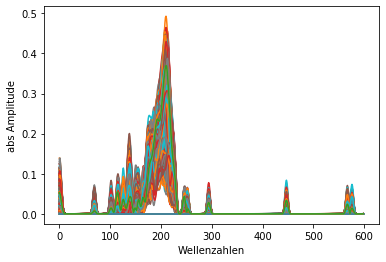

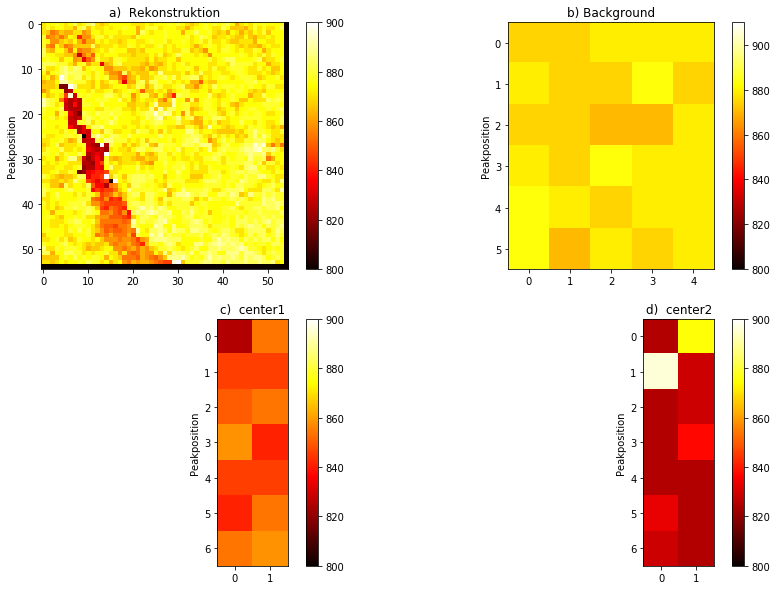

In [41]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))
'''wnZFVals = 
  Table[(j - 
      1)*1/(2*(zerofilling + 1)*
       importDataScanS/10000.), {j, (zerofilling + 1)*dimDat[[2]]}];'''
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko1[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        #print(offsetReko1)
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        #print(np.subtract(RekoA,-offsetReko)) 
        #plt.plot (np.real(offReko))
        offRekozerofilling= np.concatenate([offReko,zerof])
        #print(offRekozerofilling)
        #plt.plot (np.real(offRekozerofilling))
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #print (wrapReko)
        #plt.plot (np.real(wrapReko))
        plt.plot(np.zeros(600))
        #filtering
        filReko = Filter(1,400)*wrapReko
        #print(filReko)
        #plt.plot(np.absolute(filReko))
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]
plt.plot(np.absolute(ftRekohalve))

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10))

RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()


plt.subplot(221)
plt.imshow(pos_Reko_Max,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('a)  Rekonstruktion')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(222) 
plt.imshow(posback1Reko,vmin=800, vmax=910, cmap='hot', interpolation='none') #vmin=750, vmax=900
plt.title('b) Background')
#plt.legend()
plt.xlabel('')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(223)
plt.imshow(RekoA,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('c)  center1')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
plt.subplot(224)
plt.imshow(RekoA2,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('d)  center2')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
#plt.savefig("E3Indent_Peakposition.pdf")

NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[0]=SNRposReko
SNR2[0]=SNRposReko2

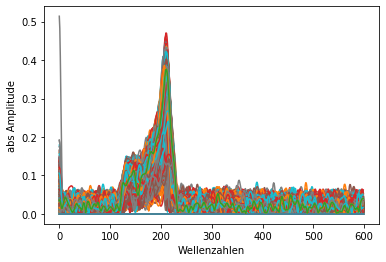

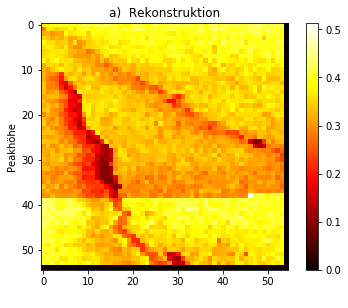

In [43]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
hight_Reko_Max=np.zeros((55,55))
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(datafull[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        plt.plot(np.zeros(600))
        #filtering
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        plt.plot(np.absolute(ftRekohalve))
        hight_Reko_Max[g,h]=  np.amax(np.absolute(ftRekohalve))
plt.plot(np.absolute(ftRekohalve))

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10))




plt.subplot(221)
plt.imshow(hight_Reko_Max, cmap='hot', interpolation='none')
plt.title('a)  Rekonstruktion')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakhöhe')
plt.colorbar()


#plt.savefig("E3Indent_Peakposition.pdf")



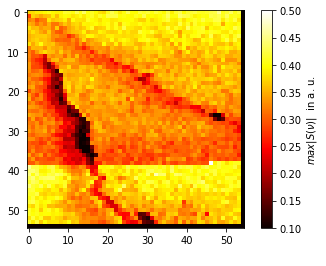

AttributeError: 'AxesImage' object has no attribute 'savefig'

In [51]:
plt.imshow(hight_Reko_Max,vmin=0.1, vmax=0.5, cmap='hot', interpolation='none')
plt.title('')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('')
cbar=plt.colorbar()
cbar.set_label(r'$max|S(\nu)|$  in a. u.')


In [18]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko2[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[1]=SNRposReko
SNR2[1]=SNRposReko2



In [19]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko3[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[2]=SNRposReko
SNR2[2]=SNRposReko2



In [20]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko4[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[3]=SNRposReko
SNR2[3]=SNRposReko2



In [21]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko5[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[4]=SNRposReko
SNR2[4]=SNRposReko2



In [22]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko6[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[5]=SNRposReko
SNR2[5]=SNRposReko2



In [23]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko7[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[6]=SNRposReko
SNR2[6]=SNRposReko2



In [24]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko8[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[7]=SNRposReko
SNR2[7]=SNRposReko2



In [25]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko9[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[8]=SNRposReko
SNR2[8]=SNRposReko2



In [26]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko10[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[9]=SNRposReko
SNR2[9]=SNRposReko2



In [27]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko11[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[10]=SNRposReko
SNR2[10]=SNRposReko2



In [28]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko12[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[11]=SNRposReko
SNR2[11]=SNRposReko2



In [29]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko13[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[12]=SNRposReko
SNR2[12]=SNRposReko2



In [30]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko14[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[13]=SNRposReko
SNR2[13]=SNRposReko2



In [31]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko15[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[14]=SNRposReko
SNR2[14]=SNRposReko2



In [32]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko16[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[15]=SNRposReko
SNR2[15]=SNRposReko2



In [33]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko17[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[16]=SNRposReko
SNR2[16]=SNRposReko2



In [34]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko18[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[17]=SNRposReko
SNR2[17]=SNRposReko2



In [35]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko19[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[18]=SNRposReko
SNR2[18]=SNRposReko2



In [36]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko20[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[19]=SNRposReko
SNR2[19]=SNRposReko2



In [ ]:
Ersetzen aller negativen SNR-Einträge durch 0, da physikalisch nicht relevant und Speicherung der werte unter SNR45_1 für Signalregion 1 und SNR45_2 für Signalregion 2

In [37]:
print( 'center position 1' )

print( SNR1  )
print('is SNR of pos(max(Reko))' )
print( 'center position 2' )

print( SNR2 )
print('is SNR of pos(max(Reko))' )
np.save('SNR45_1', SNR1)
np.save('SNR45_2', SNR2)

center position 1
[3.20518339+0.j 1.91973501+0.j 2.77604707+0.j 2.58313437+0.j
 2.28207241+0.j 1.81115685+0.j 1.81115685+0.j 2.7943272 +0.j
 4.01946316+0.j 3.47305221+0.j 3.27952229+0.j 2.74438637+0.j
 2.60609027+0.j 3.07684475+0.j 2.27538666+0.j 3.363865  +0.j
 3.69784671+0.j 2.69386101+0.j 3.43068539+0.j 2.83695359+0.j]
is SNR of pos(max(Reko))
center position 2
[1.96056132+0.j 1.39684481+0.j 2.91597289+0.j 1.97453682+0.j
 1.04805321+0.j 4.06019502+0.j 4.06019502+0.j 1.74391118+0.j
 1.05493081+0.j 0.98762539+0.j 1.21556883+0.j 1.57844506+0.j
 1.12176358+0.j 2.20928834+0.j 2.30452978+0.j 2.76206025+0.j
 2.02814323+0.j 4.08265679+0.j 0.56405721+0.j 1.37785037+0.j]
is SNR of pos(max(Reko))


In [38]:
print (np.mean(SNR1),'is Mean of SNR1 with a standard deviation of', np.std(SNR1)/(np.sqrt(20)))

print (np.mean(SNR2),'is Mean of SNR2 with a standard deviation of', np.std(SNR2)/(np.sqrt(20)))


(2.834038528196915+0j) is Mean of SNR1 with a standard deviation of 0.13494841316202183
(2.0223594954706243+0j) is Mean of SNR2 with a standard deviation of 0.2326076404070727
